# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# <Student to fill this section>
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Praveen Bharath"
student_id = "25615004"
group_id = "25"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [7]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [8]:
# <Student to fill this section>
business_use_case_description = """
Explain clearly what is the goal of this project for the business.
"""

In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [10]:
# <Student to fill this section>
business_objectives = """
What will be the impact of accurate or incorrect results?
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [12]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
How will the results be used?
Who will be the users of your predictions? Who will be impacted by your predictions?
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [14]:
 #Loading the data
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [15]:
# Viewing the training data
train_df.head(10)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,Pacific,BW,26,52.6,111.8,19.3,61.8,64.93,1.1,7.5,...,-1.342010,0.2308,1.5769,1.8077,2.2308,0.6538,0.0769,9.6538,681edf6e-41cb-4fd1-ba91-da573e063fbc,0.0
1,Mississippi,SEC,2,0.8,63.6,29.6,33.3,33.33,0.0,21.5,...,-5.421040,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,3542dcb7-19ad-47f2-8b3a-eb79eb3ec4c4,0.0
2,Stephen F. Austin,Slnd,4,0.6,61.4,21.7,50.0,50.00,0.0,0.0,...,6.466500,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.5000,ca0d8700-807d-4fce-a7a9-63922d1981e6,0.0
3,Virginia,ACC,28,59.2,88.2,21.7,46.2,47.25,1.5,9.7,...,1.459130,0.3214,2.0357,2.3571,3.0000,1.2857,0.0714,7.7500,01285c6b-bc71-4fa8-941a-28cf3976a117,0.0
4,Elon,SC,21,13.7,47.5,15.0,26.2,26.20,5.8,2.3,...,-3.756940,0.3810,0.1429,0.5238,0.4286,0.1905,0.0000,0.5714,a962c41c-55ff-461e-8585-db32e4fa0580,0.0
5,Delaware St.,MEAC,6,1.4,19.5,8.5,0.0,0.00,7.5,7.6,...,-6.055690,0.1667,0.1667,0.3333,0.0000,0.0000,0.0000,0.0000,9cd0e4eb-61ff-4a32-9005-5b6231ea1fe9,0.0
6,Rhode Island,A10,2,0.4,0.0,6.9,0.0,0.00,0.0,0.0,...,-5.947600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,201ee955-4e00-4774-a486-1dea6ce3210d,0.0
7,Nicholls St.,Slnd,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,...,-5.549370,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2fd19aa9-c020-49a3-9321-055dd6812875,0.0
8,Alabama St.,SWAC,30,38.2,100.7,18.8,50.4,48.72,7.7,11.0,...,2.470850,0.9667,1.6000,2.5667,1.2333,1.0667,0.1333,4.5667,aa6b5eb6-efeb-4bef-8b48-5158657fe71d,0.0
9,Tennessee,SEC,34,45.9,102.7,19.6,51.8,53.06,3.9,9.6,...,-0.093243,0.6765,1.5588,2.2353,0.8824,0.5000,0.1765,7.5588,4fa4c224-4b41-45dc-add1-d76264554688,0.0


In [16]:
# Viewing the test data
test_df.head(10)

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,UC Davis,BW,8,2.2,51.7,13.4,30.0,30.00,0.0,14.3,...,-11.240100,-4.721030,0.1000,0.6000,0.7000,0.2000,0.1000,0.0000,1.5000,c6d3ce49-28b6-4756-8061-b2bd68730c52
1,Campbell,BSth,25,16.4,85.0,25.2,50.0,52.10,2.0,11.8,...,-2.972020,-1.741870,0.1481,0.9259,1.0741,0.1481,0.4074,0.1111,4.0741,24dd0ae2-9d22-4d31-9cb6-c31f58f903b5
2,Weber St.,BSky,29,50.5,117.8,16.8,61.8,59.77,12.3,17.1,...,0.739055,-0.259202,2.1562,2.7500,4.9062,0.7188,0.4062,1.0625,6.7500,0cf3e822-9446-4285-b7ed-7c19d8e976fe
3,Ohio,MAC,17,14.9,85.8,13.1,34.9,34.88,5.1,13.7,...,-3.339750,-0.573442,0.5789,1.5789,2.1579,0.5263,0.1579,0.1579,2.6842,b1a88de0-6852-4597-bb92-9164b40758e5
4,New Mexico St.,WAC,26,17.1,85.8,10.8,48.1,49.46,5.6,17.4,...,-4.184970,1.718210,0.4643,1.1429,1.6071,0.1071,0.0714,0.4286,1.7500,97c327ce-d051-40f0-9166-1a43557c3c92
5,Southeast Missouri St.,OVC,24,25.6,76.1,20.2,36.5,40.44,4.1,9.5,...,-4.721770,-3.337820,0.4231,0.9615,1.3846,0.6538,0.2692,0.0769,3.0385,34fe41f0-255d-4274-8462-860a221a9d5a
6,Purdue,B10,8,2.4,93.4,24.5,46.2,46.15,11.2,20.6,...,-14.322600,0.149733,0.3750,0.6250,1.0000,0.1250,0.2500,0.3750,1.5000,f7292ab7-feed-434f-8cba-b193a02276c0
7,South Carolina,SEC,30,62.7,97.6,26.2,44.9,48.86,3.0,9.1,...,1.504390,0.045342,0.7333,2.1000,2.8333,3.1667,0.7667,0.1333,12.1000,ac793895-8cec-4d08-9480-5d0458522614
8,Butler,BE,7,1.5,100.7,21.2,41.7,44.30,6.9,42.8,...,3.857440,1.101540,0.1429,1.0000,1.1429,0.0000,0.0000,0.1429,1.0000,8b241a30-61cc-43a2-a4b3-fe4a632ef573
9,Tulane,Amer,4,0.7,200.0,7.2,100.0,100.00,0.0,13.5,...,3.462410,15.525700,0.0000,0.2500,0.2500,0.0000,0.2500,0.5000,1.0000,5ab8c5c9-eac3-469a-9400-63f685d365b5


In [17]:
# Viewing the shape
print('Training data:',train_df.shape)
print('Testing data:',test_df.shape)

Training data: (14774, 62)
Testing data: (1297, 61)


In [18]:
# Viewing the info of training data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14774 entries, 0 to 14773
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14774 non-null  object 
 1   conf                 14774 non-null  object 
 2   GP                   14774 non-null  int64  
 3   Min_per              14774 non-null  float64
 4   Ortg                 14774 non-null  float64
 5   usg                  14774 non-null  float64
 6   eFG                  14774 non-null  float64
 7   TS_per               14774 non-null  float64
 8   ORB_per              14774 non-null  float64
 9   DRB_per              14774 non-null  float64
 10  AST_per              14774 non-null  float64
 11  TO_per               14774 non-null  float64
 12  FTM                  14774 non-null  int64  
 13  FTA                  14774 non-null  int64  
 14  FT_per               14774 non-null  float64
 15  twoPM                14774 non-null 

In [19]:
# Viewing the info of test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 1297 non-null   object 
 1   conf                 1297 non-null   object 
 2   GP                   1297 non-null   int64  
 3   Min_per              1297 non-null   float64
 4   Ortg                 1297 non-null   float64
 5   usg                  1297 non-null   float64
 6   eFG                  1297 non-null   float64
 7   TS_per               1297 non-null   float64
 8   ORB_per              1297 non-null   float64
 9   DRB_per              1297 non-null   float64
 10  AST_per              1297 non-null   float64
 11  TO_per               1297 non-null   float64
 12  FTM                  1297 non-null   int64  
 13  FTA                  1297 non-null   int64  
 14  FT_per               1297 non-null   float64
 15  twoPM                1297 non-null   i

### C.2 Define Target variable

In [20]:
# <Student to fill this section>
target_definition_explanations = """
The target variable 'drafted' indicates whether a player was selected in the NBA draft. This binary definition aligns with the business goal of predicting draft success based on performance metrics, helping scouts and analysts identify high-potential players and optimize recruitment strategies.
"""

In [21]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [22]:
# <Student to fill this section>

target_name = 'drafted'

### C.4 Explore Target variable

In [23]:
# Viewing the balance of the data
train_df['drafted'].value_counts()

,count
drafted,
0.0,14656
1.0,118


In [24]:
# Viewing the distribution in percentage
train_df['drafted'].value_counts(normalize=True) * 100

,proportion
drafted,
0.0,99.2013
1.0,0.7987


In [25]:
# <Student to fill this section>
target_distribution_explanations = """
The target variable 'drafted' is highly imbalanced, with ~99.2% not drafted and ~0.8% drafted. This imbalance may bias models toward the majority class and affect performance metrics like accuracy.
"""

In [26]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `\<player_id\>`

In [27]:
# Unique player_ids in test data
train_df['player_id'].nunique()

12155

In [28]:
# Unique player_ids in test data
test_df['player_id'].nunique()

1297

In [29]:
# <Student to fill this section>
feature_1_insights = """
player_id must be unique to avoid inconsistent or conflicting data. If used as a feature, it can cause data leakage by allowing the model to memorize rather than learn patterns. Duplicate IDs may lead to errors in prediction and evaluation. It should be excluded from model training and used only to identify predictions in the final submission

There are duplicates in player_id — meaning some players appear more than once in your training data. Need to be removed in the duplicates row section (cleaning)
"""

In [30]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

---
## D. Feature Selection


**Features will be selected after data preparation.**

---
## E. Data Preparation

### E.1 Data Transformation <remove_duplicates>

In [31]:
# Number of duplicate values
train_df.duplicated().sum()

np.int64(2462)

In [32]:
# Saving a copy of original data
train_df_copy = train_df.copy()

In [33]:
# Dropping the duplicates
train_df_cleaned = train_df.drop_duplicates()

In [34]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Removing duplicate player records ensures the model does not learn biased patterns from repeated data. In the context of draft prediction, duplicates can overrepresent certain players, skewing feature importance and reducing the models ability to generalize across new, unseen players.
"""

In [35]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Transformation <features_high_missing_values>

In [36]:
# Checking for missing values
missing_values = train_df_cleaned.isna().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

,0
Rec_Rank,8240
dunks_ratio,7831
rim_ratio,2672
mid_ratio,2665
midmade,1720
rimmade,1720
dunksmade,1720
dunksmiss_dunksmade,1720
rimmade_rimmiss,1720
midmade_midmiss,1720


Drop Rec_Rank and dunks_ratio due to high missing values

In [37]:
# Dropping features
train_df_cleaned = train_df_cleaned.drop(columns=['Rec_Rank', 'dunks_ratio'])
train_df_cleaned.shape

(12312, 60)

In [38]:
# <Student to fill this section>
data_cleaning_2_explanations = """
Dropping Rec_Rank and dunks_ratio is a good choice due to their high missing rates and low predictive value. The remaining features are performance-based and worth keeping. Removing all rows with missing values after dropping those two columns ensures a clean dataset. We will retain enough data (maybe 8 or 10K rows) for effective model training. This approach balances data quality and feature importance.
"""

In [39]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### E.3 Data Transformation <missing_values>

In [40]:
# Viewing total missing values
train_df_cleaned.isna().sum().sum()

np.int64(16996)

In [41]:
# Dropping rows with missing values
train_df_cleaned = train_df_cleaned.dropna()
train_df_cleaned.shape

(8910, 60)

In [42]:
# <Student to fill this section>
data_cleaning_3_explanations = """
there are no missing values left in df_train_clean.
now we have a clean dataset with 8910 complete rows and 60 features — ready for modeling

irrelevant_features = team conf year type player_id yr ht. ht is not what metadata says (heigth of student)
"""

In [43]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

### E.n Fixing "\<irrelevant_features\>"

> You can add more cells related to other issues in this section

In [44]:
# Define the list of irrelevant features
irrelevant_features = ['team', 'conf', 'year', 'type', 'player_id','yr','ht']

# Drop them from the dataset
train_df_cleaned = train_df_cleaned.drop(columns=irrelevant_features)

---
## F. Feature Engineering

**Features are good and doesn't require any engineering.**

In [45]:
# Copying the dataset
train_df_engineered = train_df_cleaned.copy()

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [46]:
# Splitting features and target
X = train_df_engineered.drop(columns='drafted')
y = train_df_engineered['drafted']

In [47]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X,       # original features
    y,       # original target column
    test_size=0.2, # 20% for validation
    stratify=y,  # keep class balance
    random_state=8    # for reproducibility widely used convention.
)

In [48]:
# List of features that were removed from training data
features_to_be_dropped = ['Rec_Rank','dunks_ratio','team', 'conf', 'year', 'type', 'yr', 'ht']

# Dropping them from test data
test_df = test_df.drop(columns=features_to_be_dropped, errors='ignore')

In [49]:
# Viewing the test data shape after dropping
test_df.shape

(1297, 53)

In [50]:
# Viewing training data shape for confirmation of columns
train_df_engineered.shape

(8910, 53)

In [51]:
# Total missing values per column
missing_values = test_df.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]

# Print summary
print("Missing values in df_test:")
print(missing_values)

Missing values in df_test:
ast_tov                125
rimmade                 61
rimmade_rimmiss         61
midmade                 61
midmade_midmiss         61
rim_ratio              178
mid_ratio              196
dunksmade               61
dunksmiss_dunksmade     61
dtype: int64


In [52]:
# Replacing null values with 0
test_df.fillna(0, inplace=True)

In [53]:
# Copy of test data
test_df_cleaned = test_df.copy()

In [54]:
# Saving the feature 'player_id' to use in the final submission
player_ids = test_df_cleaned['player_id']
len(player_ids)

1297

In [55]:
# Dropping player_id to get the test features
X_test = test_df_cleaned.drop(columns='player_id')

In [56]:
# Viewing the training data's shape
X_train.shape

(7128, 52)

In [57]:
# Viewing the validation data's shape
X_val.shape

(1782, 52)

In [58]:
# Viewing the test data's shape
X_test.shape

(1297, 52)

---
## H. Save Datasets

> Do not change this code

In [59]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv('data/processed/X_train.csv', index=False)
  y_train.to_csv('data/processed/y_train.csv', index=False)

  X_val.to_csv('data/processed/X_val.csv', index=False)
  y_val.to_csv('data/processed/y_val.csv', index=False)

  X_test.to_csv('data/processed/X_test.csv', index=False)
  #y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

Cannot save file into a non-existent directory: 'data/processed'


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


**AUROC is the performance metric.**

---


## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [60]:
from sklearn.linear_model import LogisticRegression
import os
import pandas as pd

In [61]:
logreg_model = LogisticRegression(
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=200,
    random_state=42
)


### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [62]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters
"""

In [63]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [64]:
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [65]:
# <Student to fill this section>

In [66]:
y_pred = logreg_model.predict(X_test)
y_pred_probs = logreg_model.predict_proba(X_test)[:, 1]

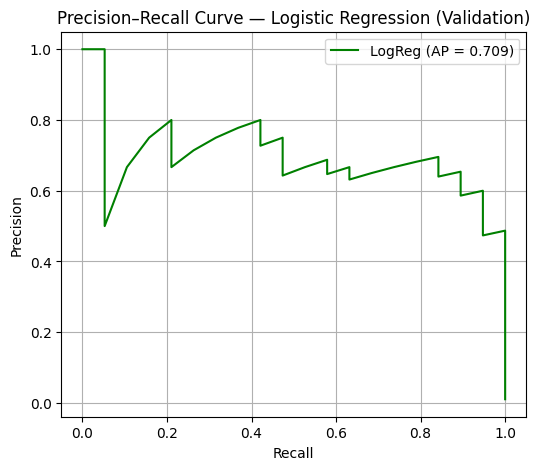

In [67]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities for validation set
y_val_pred_probs = logreg_model.predict_proba(X_val)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred_probs)
ap = average_precision_score(y_val, y_val_pred_probs)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"LogReg (AP = {ap:.3f})", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Logistic Regression (Validation)")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


In [68]:
# <Student to fill this section>
model_performance_explanations = """
Provide some explanations on model performance
"""

Predict probabilities for test set (for Kaggle submission)

In [69]:
print(len(test_df_cleaned['player_id']))       # Should be 1297
print(len(y_pred_probs))          # Should also be 1297

1297
1297


In [70]:
# === DEBUG: fingerprint + basic stats for Logistic Regression experiment ===
import os, json, hashlib, numpy as np

# Make sure this matches the variable you used for probabilities
_probs = np.asarray(y_pred_probs, dtype=float)

stats = {
    "model_tag": "exp3_logreg",
    "count": int(_probs.size),
    "mean": float(np.mean(_probs)),
    "std": float(np.std(_probs)),
    "min": float(np.min(_probs)),
    "max": float(np.max(_probs)),
    "unique_rounded_4": int(len(np.unique(np.round(_probs, 4)))),
}

# Fingerprint of the entire prediction vector
stats["sha256"] = hashlib.sha256(_probs.tobytes()).hexdigest()

# Save to JSON file
os.makedirs("debug_stats", exist_ok=True)
with open("debug_stats/preds_stats_exp3_logreg.json", "w") as f:
    json.dump(stats, f, indent=2)

# Print for quick inspection
print("== Debug stats (exp3_logreg) ==")
print(json.dumps(stats, indent=2))

== Debug stats (exp3_logreg) ==
{
  "model_tag": "exp3_logreg",
  "count": 1297,
  "mean": 0.015331181618141825,
  "std": 0.09821450628382912,
  "min": 1.1831639469826017e-19,
  "max": 0.9999963653382056,
  "unique_rounded_4": 135,
  "sha256": "88830aa558e8c69d4d61e17b70d6a3d7f1db1e5eced5da209a0954b1ff43f431"
}


Create submission DataFrame

In [71]:
submission_df = pd.DataFrame({
    "player_id": test_df_cleaned['player_id'],
    "drafted": y_pred_probs
})

Save to CSV

In [81]:
from google.colab import files
submission_df.to_csv("submission_exp3.csv", index=False)
files.download("submission_exp3.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
model_performance_explanations = ''

In [74]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [75]:
# <Student to fill this section>
business_impacts_explanations = """
Interpret the results of the experiments related to the business objective set earlier. Estimate the impacts of the incorrect results for the business (some results may have more impact compared to others)
"""

In [76]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [77]:
# <Student to fill this section>
experiment_outcome = "" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [78]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [79]:
# <Student to fill this section>
experiment_results_explanations = """
Reflect on the outcome of the experiment and list the new insights you gained from it. Provide rationale for pursuing more experimentation with the current approach or call out if you think it is a dead end.
Given the results achieved and the overall objective of the project, list the potential next steps and experiments. For each of them assess the expected uplift or gains and rank them accordingly. If the experiment achieved the required outcome for the business, recommend the steps to deploy this solution into production.
"""

In [80]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)